# 1) Se cargan las librerias necesarias

In [1]:
# Librerías estándar y manipulación de archivos
import os
import joblib
import json
import pickle

# Manipulación de datos y operaciones básicas
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Reducción de dimensionalidad
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Selección y validación de modelos
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV, StratifiedKFold

# Técnicas de balanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.pipeline import Pipeline

# Métricas de evaluación
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc

# Configuraciones adicionales
import warnings

# Se ignoran los warnings en el notebook
warnings.filterwarnings('ignore')

# 2) Carga y visualización de la base de datos

## Datos de citas médicas
ScheduledDay
- mínimo 2015-11-10
- máximo 2016-06-08

AppointmentDay
- mínimo 2016-04-29
- máximo 2016-06-08

In [2]:
medical_appointments = pd.read_csv('Attendance of Medical Appointments in Brazil (may2016).csv')
# Numero de filas y columnas
medical_appointments.shape

(110527, 14)

In [3]:
medical_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Información de las columnas
medical_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Numero de valores únicos por columna
column_counts = medical_appointments.nunique()
print(column_counts)

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


## Datos geográficos de 'Neighbourhood'

In [6]:
import pandas as pd

# Obtener valores distintos de la columna 'Neighbourhood' y ordenarlos de forma ascendente
neighbourhoods_unique_sorted = sorted(medical_appointments['Neighbourhood'].unique())

# Crear un DataFrame con los valores únicos de 'Neighbourhood'
neighbourhoods_df = pd.DataFrame(neighbourhoods_unique_sorted, columns=['Neighbourhood'])

# Exportar el DataFrame a un archivo Excel
neighbourhoods_df.to_excel('Neighbourhoods.xlsx', index=False)

Manualmente y mediante la información geográfica de los barrios de Brasil obtenida en https://github.com/alanwillms/geoinfo y las unidades de salud https://www.vitoria.es.gov.br/cidadao/servicos-para-a-pessoa-idosa#a_listaunidadesdesaude se genera el fichero excel 'Neighbourhoods Brazil.xlsx'

NOTA: HealthCentre recoge si el barrio tiene (1) o no (0) un centro de salud.

In [7]:
neighborhoods_geo_data = pd.read_excel('Neighbourhoods Brazil.xlsx')

In [8]:
neighborhoods_geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighbourhood           81 non-null     object 
 1   LatitudeNeighbourhood   81 non-null     float64
 2   LongitudeNeighbourhood  81 non-null     float64
 3   HealthCentre            81 non-null     int64  
 4   LatitudeHealthCentre    30 non-null     float64
 5   LongitudeHealthCentre   30 non-null     float64
 6   NameHealthCentre        30 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 4.6+ KB


In [9]:
# Información de las columnas
neighborhoods_geo_data.head()

,Neighbourhood,LatitudeNeighbourhood,LongitudeNeighbourhood,HealthCentre,LatitudeHealthCentre,LongitudeHealthCentre,NameHealthCentre
0,AEROPORTO,-20.258100,-40.286400,0,NaN,NaN,NaN
1,ANDORINHAS,-20.287964,-40.305672,1,-20.290608,-40.306925,Unidade de Saúde - Andorinhas - Dr. Luis Claud...
2,ANTÔNIO HONÓRIO,-20.263121,-40.298013,0,NaN,NaN,NaN
3,ARIOVALDO FAVALESSA,-20.314683,-40.356385,0,NaN,NaN,NaN
4,BARRO VERMELHO,-20.294978,-40.298013,0,NaN,NaN,NaN


In [10]:
# Importar las bibliotecas necesarias
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# Seleccionar las características de entrada para el clustering (latitud y longitud) de los barrios
X_neighborhoods = neighborhoods_geo_data[['LatitudeNeighbourhood', 'LongitudeNeighbourhood']]

# Definir el número de clusters deseado
n_clusters = 10

# Inicializar y ajustar el modelo de K-Means para los barrios
kmeans_neighborhoods = KMeans(n_clusters=n_clusters)
kmeans_neighborhoods.fit(X_neighborhoods)

# Obtener las etiquetas de cluster asignadas a cada barrio
cluster_labels_neighborhoods = kmeans_neighborhoods.labels_

# Añadir las etiquetas de cluster al DataFrame original de los barrios
neighborhoods_geo_data['Cluster'] = cluster_labels_neighborhoods

# Definir un diccionario de colores para cada cluster
cluster_colors = {
    0: 'pink',
    1: 'blue',
    2: 'green',
    3: 'purple',
    4: 'orange',
    5: 'lightgreen',
    6: 'cadetblue',
    7: 'beige',
    8: 'darkblue',
    9: 'beige'
}

# Crear un mapa
map_clusters = folium.Map(location=[neighborhoods_geo_data['LatitudeNeighbourhood'].mean(),
                                    neighborhoods_geo_data['LongitudeNeighbourhood'].mean()],
                        zoom_start=11)

# Agregar un grupo de marcadores al mapa para los barrios
marker_cluster_neighborhoods = MarkerCluster().add_to(map_clusters)

# Agregar los marcadores de los barrios al grupo con colores correspondientes a cada cluster
for index, row in neighborhoods_geo_data.iterrows():
    folium.Marker(
        location=[row['LatitudeNeighbourhood'], row['LongitudeNeighbourhood']],
        popup=f"Neighbourhood: {row['Neighbourhood']}<br>Cluster: {row['Cluster']}",
        # Utilizar el color correspondiente al cluster en el diccionario
        icon=folium.Icon(color=cluster_colors[row['Cluster']])
    ).add_to(marker_cluster_neighborhoods)

# Agregar un grupo de marcadores al mapa para los centros de salud
marker_cluster_health_centres = MarkerCluster().add_to(map_clusters)

# Agregar los marcadores de los centros de salud al grupo
for index, row in neighborhoods_geo_data.iterrows():
    if pd.notnull(row['LatitudeHealthCentre']) and pd.notnull(row['LongitudeHealthCentre']):
        folium.Marker(
            location=[row['LatitudeHealthCentre'], row['LongitudeHealthCentre']],
            popup=f"Health Centre: {row['NameHealthCentre']}<br>",
            icon=folium.Icon(color='red', icon='home')
        ).add_to(marker_cluster_health_centres)
    
    
# Guardar el mapa como un archivo HTML
map_clusters.save("map_KMeans_10_with_health_centres.html")


In [11]:
# Información de las columnas
neighborhoods_geo_data.head()

,Neighbourhood,LatitudeNeighbourhood,LongitudeNeighbourhood,HealthCentre,LatitudeHealthCentre,LongitudeHealthCentre,NameHealthCentre,Cluster
0,AEROPORTO,-20.258100,-40.286400,0,NaN,NaN,NaN,6
1,ANDORINHAS,-20.287964,-40.305672,1,-20.290608,-40.306925,Unidade de Saúde - Andorinhas - Dr. Luis Claud...,5
2,ANTÔNIO HONÓRIO,-20.263121,-40.298013,0,NaN,NaN,NaN,6
3,ARIOVALDO FAVALESSA,-20.314683,-40.356385,0,NaN,NaN,NaN,3
4,BARRO VERMELHO,-20.294978,-40.298013,0,NaN,NaN,NaN,5


## Datos climáticos

In [12]:
climate_data = pd.read_excel('Weather and Climate Brazil.xlsx')

In [13]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           41 non-null     datetime64[ns]
 1   Temperature    41 non-null     float64       
 2   WindSpeed      41 non-null     float64       
 3   Precipitation  41 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.4 KB


In [14]:
climate_data.head()

,Date,Temperature,WindSpeed,Precipitation
0,2016-04-29,24.03,10.45,0.94
1,2016-04-30,27.16,6.27,0.21
2,2016-05-01,24.03,14.62,0.42
3,2016-05-02,24.03,13.58,0.00
4,2016-05-03,25.07,9.40,0.00


## Añadir a las citas médicas los datos geográficos asociados a 'neighbourhood'

In [15]:
# Campos que deseas añadir a 'medical_appointments'
columns_to_add = ['Neighbourhood', 'HealthCentre']

# Fusionar los DataFrames en función de la columna 'Neighbourhood'
medical_appointments = medical_appointments.merge(neighborhoods_geo_data[columns_to_add], on='Neighbourhood', how='left')


In [16]:
# Renombrar las columnas Longitud y Latitud
medical_appointments = medical_appointments.rename(columns={'HealthCentre': 'HaveHealthCentre'})

In [17]:
medical_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientId         110527 non-null  float64
 1   AppointmentID     110527 non-null  int64  
 2   Gender            110527 non-null  object 
 3   ScheduledDay      110527 non-null  object 
 4   AppointmentDay    110527 non-null  object 
 5   Age               110527 non-null  int64  
 6   Neighbourhood     110527 non-null  object 
 7   Scholarship       110527 non-null  int64  
 8   Hipertension      110527 non-null  int64  
 9   Diabetes          110527 non-null  int64  
 10  Alcoholism        110527 non-null  int64  
 11  Handcap           110527 non-null  int64  
 12  SMS_received      110527 non-null  int64  
 13  No-show           110527 non-null  object 
 14  HaveHealthCentre  110527 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 12.6+ MB


In [18]:
# Información de las columnas
medical_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,HaveHealthCentre
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


## Añadir a las citas médicas los datos climáticos

In [19]:
medical_appointments['AppointmentDay2'] = pd.to_datetime(medical_appointments['AppointmentDay'].str[:10], format='%Y-%m-%d')

# Combinar los datasets utilizando el campo AppointmentDay2 de medical_appointments y el campo Date de climate_data
medical_appointments = medical_appointments.merge(climate_data, left_on='AppointmentDay2', right_on='Date', how='left')

# Eliminar las columnas AppointmentDay2 y Date
medical_appointments.drop(columns=['AppointmentDay2', 'Date'], inplace=True)

In [20]:
medical_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientId         110527 non-null  float64
 1   AppointmentID     110527 non-null  int64  
 2   Gender            110527 non-null  object 
 3   ScheduledDay      110527 non-null  object 
 4   AppointmentDay    110527 non-null  object 
 5   Age               110527 non-null  int64  
 6   Neighbourhood     110527 non-null  object 
 7   Scholarship       110527 non-null  int64  
 8   Hipertension      110527 non-null  int64  
 9   Diabetes          110527 non-null  int64  
 10  Alcoholism        110527 non-null  int64  
 11  Handcap           110527 non-null  int64  
 12  SMS_received      110527 non-null  int64  
 13  No-show           110527 non-null  object 
 14  HaveHealthCentre  110527 non-null  int64  
 15  Temperature       110527 non-null  float64
 16  WindSpeed         11

In [21]:
medical_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,HaveHealthCentre,Temperature,WindSpeed,Precipitation
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,24.03,10.45,0.94
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,24.03,10.45,0.94
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,24.03,10.45,0.94
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,24.03,10.45,0.94
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,24.03,10.45,0.94


## Análisis distribución de datos

Preguntas preliminares (https://www.kaggle.com/code/ricardoroggia/no-show-medical-appointments)
- ¿Cuáles son las principales características que influyen en los resultados de no asistencia?
- ¿Qué tipo de enfermedad influye más en las ausencias?
- ¿Las enfermedades combinadas influyen más en las ausencias que las separadas?
- ¿La edad es una característica importante que influye en los resultados de no asistencia?
- ¿Cuáles son los barrios con más ausencias?
- ¿La escolaridad influye en los resultados de no comparecencia?
- ¿Afecta el sexo? ¿Y según el sexo y la edad?
- ¿Las diferencias entre el día programado y el día de la cita afectan a los resultados?
- ¿Los SMS recibidos influyen en los resultados?
- ¿Qué mes tiene más resultados de no-show?".
- ¿Cuáles son las principales características de los pacientes que influyen en las no asistencias y cómo cuantificarlas?
- Si iniciamos una campaña para reducir las no asistencias a las citas médicas, ¿deberíamos centrarnos en qué tipo de pacientes?

NOTA: En la columna No-show, el sí representa las aus encias en las citas médicas.

### - Distribución No-show

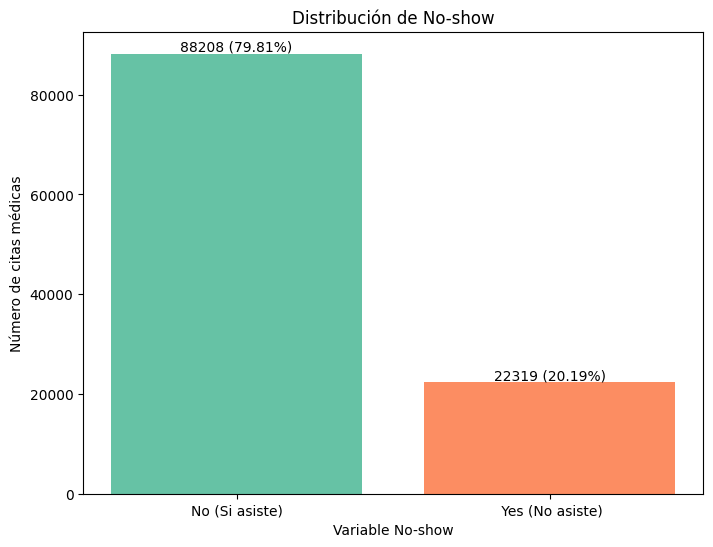

In [22]:
# Distribución del dataset original
class_counts = medical_appointments['No-show'].value_counts()

plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
plt.bar(x=class_counts.index, 
        height=class_counts.values,
        tick_label=['No (Si asiste)', ' Yes (No asiste)'], 
        color = ['#66c2a5', '#fc8d62'])

# Añadir etiquetas a las barras
for i, value in enumerate(class_counts.values):
    plt.text(i, value, f'{value} ({value / len(medical_appointments) * 100:.2f}%)', ha='center', va='bottom')
    
# Configura el título del gráfico
plt.xlabel('Variable No-show')
plt.ylabel('Número de citas médicas')
plt.title('Distribución de No-show')

# Muestra el gráfico
plt.show()

### - Distribución por condición médica

In [23]:
# Selecciona las columnas requeridas
conditions_columns = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'No-show']

# Crea un nuevo DataFrame con las columnas seleccionadas
conditions_data = medical_appointments[conditions_columns].copy()

# Reemplaza los valores distintos de cero en la columna 'Handcap' por 1
conditions_data['Handcap'] = conditions_data['Handcap'].apply(lambda x: 1 if x != 0 else x)

In [24]:
conditions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Hipertension  110527 non-null  int64 
 1   Diabetes      110527 non-null  int64 
 2   Alcoholism    110527 non-null  int64 
 3   Handcap       110527 non-null  int64 
 4   No-show       110527 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.2+ MB


In [25]:
conditions_data.head()

,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,1,0,0,0,No
1,0,0,0,0,No
2,0,0,0,0,No
3,0,0,0,0,No
4,1,1,0,0,No


#### - Distribución por condición médica individual

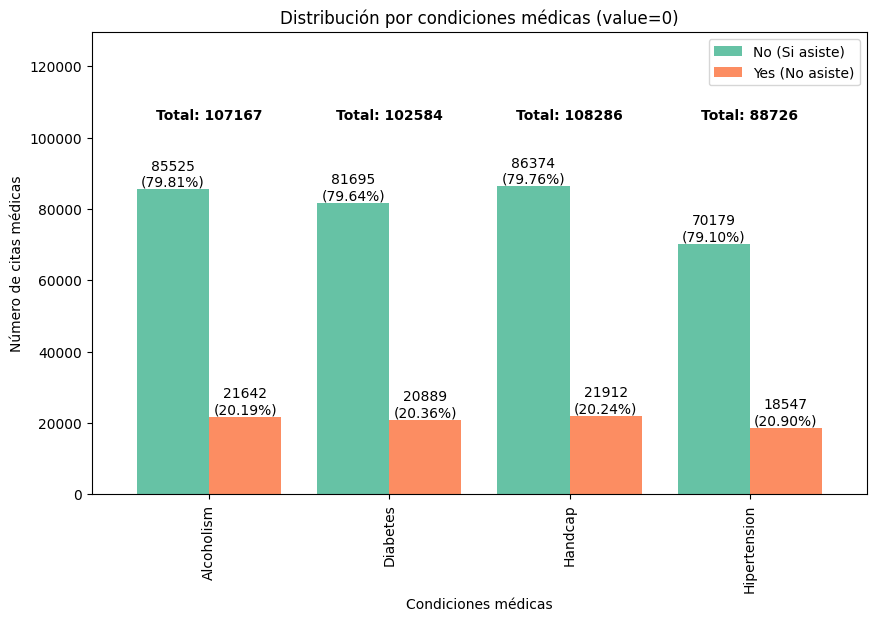

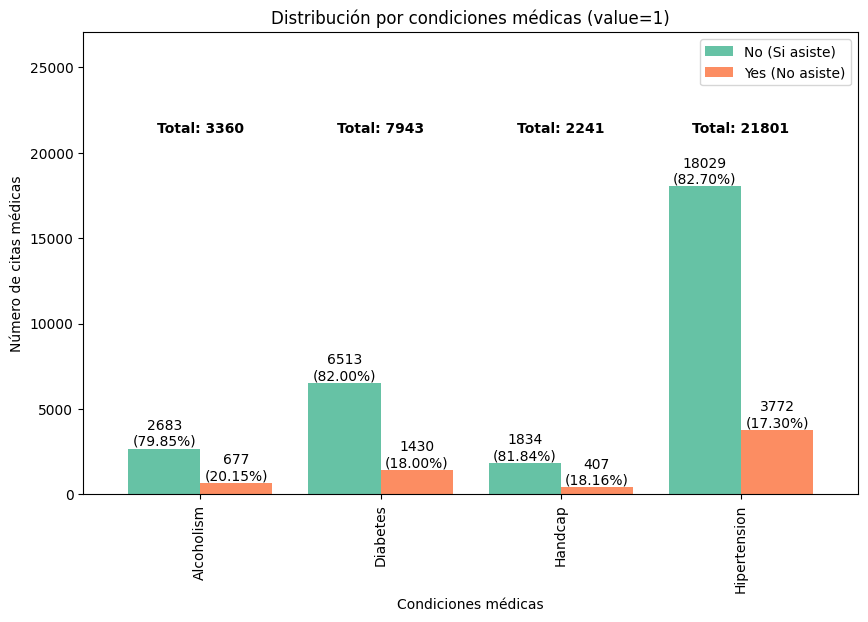

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_conditions_data(conditions_data, value):
    
    # Copia del DataFrame original para no modificar los datos originales
    conditions_data_copy = conditions_data.copy()
    
    conditions_data_copy = pd.melt(conditions_data, id_vars=['No-show'], value_vars=['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], var_name='Conditions')

    # Filtramos los datos para obtener solo los que cumplen con el valor de 'value'
    conditions_data_copy = conditions_data_copy[conditions_data_copy['value'] == value]

    # Agrupamos por 'Conditions' y 'No-show' y contamos el número de citas médicas
    conditions_grouped = conditions_data_copy.groupby(['Conditions', 'No-show']).size().unstack()

    # Creamos un gráfico de barras con Pandas
    ax = conditions_grouped.plot(kind='bar', color=['#66c2a5', '#fc8d62'], figsize=(10, 6), 
                                 width=0.80)

    # Configuramos etiquetas y título
    ax.set_xlabel('Condiciones médicas')
    ax.set_ylabel('Número de citas médicas')
    ax.set_title(f'Distribución por condiciones médicas (value={value})')

    # Mostramos el valor de cada barra
    for condition in conditions_grouped.index:
        total = conditions_grouped.loc[condition].sum()
        percentage_yes = conditions_grouped.loc[condition, 'Yes'] / total * 100
        percentage_no = conditions_grouped.loc[condition, 'No'] / total * 100

        # Ajustamos la posición vertical de las etiquetas para que aparezcan encima de las barras
        ax.text(
            conditions_grouped.index.get_loc(condition) + 0.20,  # Ajuste horizontal para las barras "Sí Asiste"
            conditions_grouped.loc[condition, 'Yes'], 
            f'{conditions_grouped.loc[condition, "Yes"]}\n({percentage_yes:.2f}%)', 
            ha='center', 
            va='bottom', 
            color='black',
            verticalalignment='bottom',  # Ajuste vertical
        )
        ax.text(
            conditions_grouped.index.get_loc(condition) - 0.20,  # Ajuste horizontal para las barras "No Asiste"
            conditions_grouped.loc[condition, 'No'], 
            f'{conditions_grouped.loc[condition, "No"]}\n({percentage_no:.2f}%)', 
            ha='center', 
            va='bottom', 
            color='black',
            verticalalignment='bottom',  # Ajuste vertical
        )

    # Mostramos el gráfico
    plt.legend(['No (Si asiste)', 'Yes (No asiste)'])

    # Ampliamos el eje y para asegurarnos de que todos los valores sean visibles
    max_value = conditions_grouped.values.max() * 1.5
    ax.set_ylim(0, max_value)

    # Calculamos y mostramos el total para cada grupo de barras de condición médica
    total_max = conditions_grouped.sum(axis=1).max()
    for i, condition in enumerate(conditions_grouped.index):
        total = conditions_grouped.loc[condition].sum()
        ax.text(
            i,  # Ajuste horizontal
            total_max,  # Ajuste vertical
            f'Total: {total}', 
            ha='center', 
            va='top', 
            color='black',
            fontsize=10,
            fontweight='bold',
        )

    plt.show()

# Llamamos a la función para value == 0
plot_conditions_data(conditions_data, value=0)

# Llamamos a la función para value == 1
plot_conditions_data(conditions_data, value=1)


#### - Distribución por condición médica combinada

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una lista de nombres de columnas con las condiciones médicas
conditions_list = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
conditions_data_filtered = conditions_data.copy()

# Añadimos una nueva columna que contenga el número de condiciones con valor 1 para cada fila
conditions_data_filtered['NumConditions'] = conditions_data_filtered[conditions_list].sum(axis=1)

# Filtrar las filas donde NumConditions es mayor que 1
conditions_data_filtered = conditions_data_filtered[conditions_data_filtered['NumConditions'] > 1]

# Función para obtener los nombres de las columnas con valor 1 en cada fila
def get_conditions_names(row):
    conditions_names = [col for col in conditions_list if row[col] == 1]
    return '-'.join(conditions_names)

# Añadir una nueva columna que contenga los nombres de las condiciones con valor 1 para cada fila
conditions_data_filtered['NameConditions'] = conditions_data_filtered.apply(get_conditions_names, axis=1)

In [28]:
conditions_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8289 entries, 4 to 110499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hipertension    8289 non-null   int64 
 1   Diabetes        8289 non-null   int64 
 2   Alcoholism      8289 non-null   int64 
 3   Handcap         8289 non-null   int64 
 4   No-show         8289 non-null   object
 5   NumConditions   8289 non-null   int64 
 6   NameConditions  8289 non-null   object
dtypes: int64(5), object(2)
memory usage: 518.1+ KB


In [29]:
conditions_data_filtered.head()

,Hipertension,Diabetes,Alcoholism,Handcap,No-show,NumConditions,NameConditions
4,1,1,0,0,No,2,Hipertension-Diabetes
36,1,1,0,0,No,2,Hipertension-Diabetes
37,1,1,0,0,No,2,Hipertension-Diabetes
44,1,1,0,0,Yes,2,Hipertension-Diabetes
46,1,0,1,0,No,2,Hipertension-Alcoholism


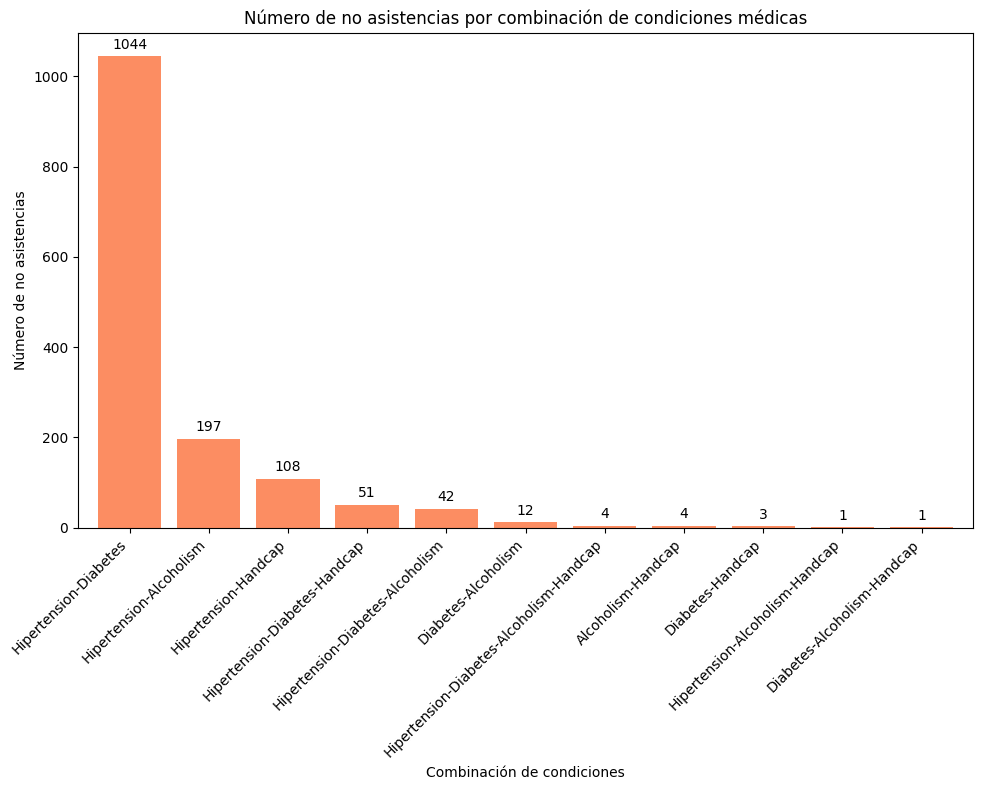

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra los datos donde No-show es igual a 'Yes'
conditions_data_filtered = conditions_data_filtered[conditions_data_filtered['No-show'] == 'Yes']

# Cuenta el número de registros por NameConditions
counts_by_condition = conditions_data_filtered['NameConditions'].value_counts()

# Crea el gráfico de barras
bars = counts_by_condition.plot(kind='bar', color=['#fc8d62'], figsize=(10, 8), width=0.80)

# Agrega los valores encima de las barras
for i, count in enumerate(counts_by_condition):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.title('Número de no asistencias por combinación de condiciones médicas')
plt.xlabel('Combinación de condiciones')
plt.ylabel('Número de no asistencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### - Distribución Gender

<Figure size 800x600 with 0 Axes>

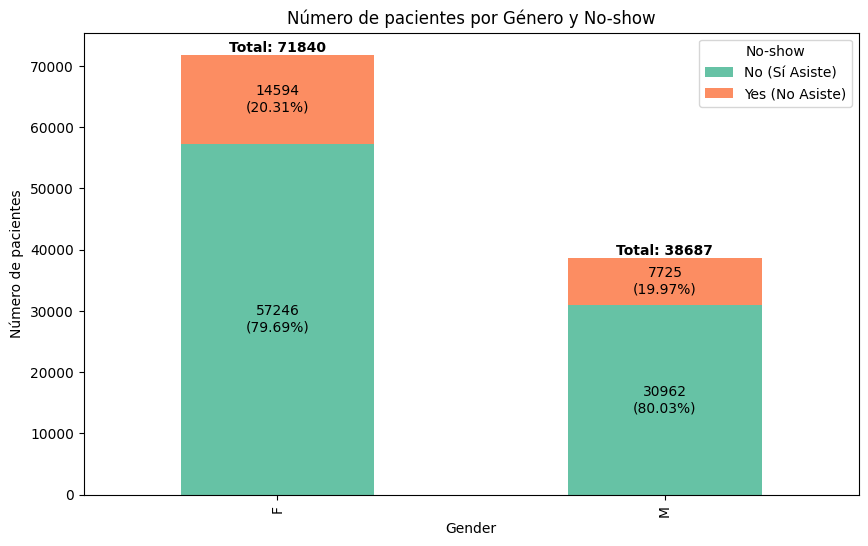

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Calcular el número de registros para cada valor de 'Gender' y 'No-show'
gender_no_show_counts = medical_appointments.groupby(['Gender', 'No-show']).size().unstack(fill_value=0)

# Calcular el total de registros para cada género
gender_total_counts = gender_no_show_counts.sum(axis=1)

# Crear el gráfico de barras apilado
ax = gender_no_show_counts.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Gender')
plt.ylabel('Número de pacientes')
plt.title('Número de pacientes por Género y No-show')

# Modificar las etiquetas del legend
legend_labels = ['No (Sí Asiste)', 'Yes (No Asiste)']
ax.legend(legend_labels, title='No-show')

# Agregar etiquetas con valores absolutos y porcentajes en cada porción de la barra
for i, gender in enumerate(gender_no_show_counts.index):
    for j, (no_show, count) in enumerate(gender_no_show_counts.loc[gender].items()):
        absolute_value = count
        percentage = count / gender_total_counts.loc[gender] * 100
        # Calcular la posición y para la etiqueta de texto
        y_position = gender_no_show_counts.loc[gender].iloc[:j].sum() + count / 2
        ax.text(i, y_position, f'{absolute_value}\n({percentage:.2f}%)', ha='center', va='center')

    # Agregar el valor total de la barra en la parte superior externa
    total_value = gender_total_counts.loc[gender]
    ax.text(i, total_value, f'Total: {total_value}', ha='center', va='bottom', fontweight='bold')

# Mostrar el gráfico
plt.show()


#### Se verifica que los pacientes tienes un único género.

In [32]:
# Filtrar los datos para encontrar PatientId con más de un valor único en la columna Gender
duplicates_gender = medical_appointments.groupby('PatientId').filter(lambda x: x['Gender'].nunique() > 1)

# Mostrar los resultados si existen duplicados
if not duplicates_gender.empty:
    print("Existen PatientId con más de un valor único en la columna Gender:")
    print(duplicates_gender[['PatientId', 'Gender']].drop_duplicates())
else:
    print("No existen PatientId con más de un valor único en la columna Gender.")

No existen PatientId con más de un valor único en la columna Gender.


### - Distribución de barrios

In [33]:
# Filtrar los datos para encontrar PatientId con más de un valor único en la columna Gender
duplicates_neighbourhood = medical_appointments.groupby('PatientId').filter(lambda x: x['Neighbourhood'].nunique() > 1)

# Mostrar los resultados si existen duplicados
if not duplicates_neighbourhood.empty:
    print("Existen PatientId con más de un valor único en la columna Neighbourhood:")
    print(duplicates_neighbourhood[['PatientId', 'Neighbourhood']].drop_duplicates())
else:
    print("No existen PatientId con más de un valor único en la columna Neighbourhood.")

No existen PatientId con más de un valor único en la columna Neighbourhood.


### - Distribución de pacientes por número de citas

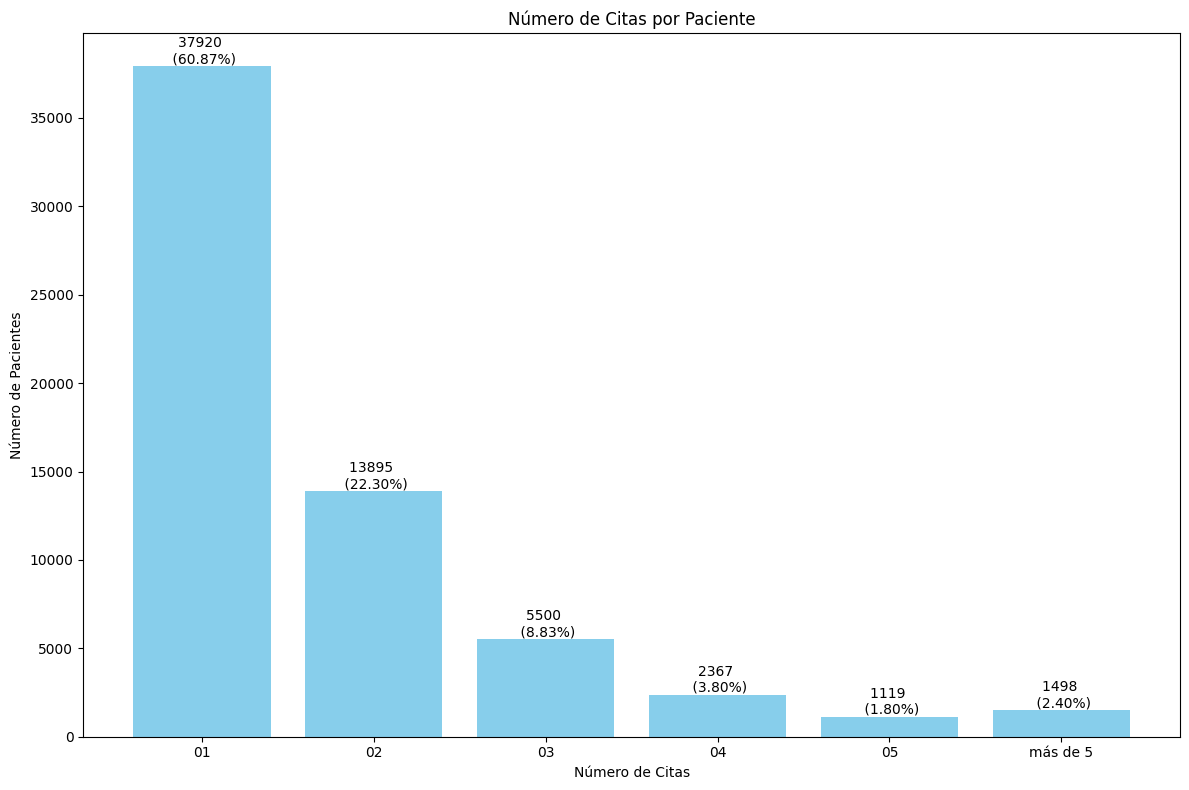

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que el DataFrame se llama medical_appointments
# Primero, contamos el número de citas por paciente
appointments_per_patient = medical_appointments.groupby('PatientId')['AppointmentID'].count()

# Clasificamos las citas mayores que 15 como 'más de 5'
appointments_per_patient = appointments_per_patient.apply(lambda x: 'más de 5' if x > 5 else str(x).zfill(2))

# Luego, contamos cuántos pacientes tienen ese número de citas
patients_per_appointment  = appointments_per_patient.value_counts().sort_index()

# Calculamos el total de citas
total_appointment = patients_per_appointment.sum()

# Creamos el gráfico
plt.figure(figsize=(12, 8))
bars = plt.bar(patients_per_appointment.index, patients_per_appointment.values, color='skyblue')

# Agregamos etiquetas a cada barra
for bar, value in zip(bars, patients_per_appointment.values):
    porcentaje = (value / total_appointment) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f"{value} \n ({porcentaje:.2f}%)", ha='center', va='bottom')

plt.xlabel('Número de Citas')
plt.ylabel('Número de Pacientes')
plt.title('Número de Citas por Paciente')

plt.tight_layout() 
plt.show()


Basados en la hipótesis de que AppointmentID es incremental y corresponde a la creación de la cita, hemos verificado que su ordenación no es idéntica cuando se ordena por ScheduledDay. En total, hemos identificado que 1458 registros no coinciden en la ordenación por AppointmentID y ScheduledDay. Ver excel: ComprobacionOrdenacion.xlsx

# 3) Feature Engeniering

In [58]:
# Se crea una copia del dataset original
medical_appointments_transformed = medical_appointments.copy()

# Transformar de object a booelan el campo No-show
medical_appointments_transformed['No-show'] = medical_appointments_transformed['No-show'].replace({'Yes': True, 'No': False})

# Transformar de int a booelan el campo 'HaveHealthCentre'
medical_appointments_transformed['HaveHealthCentre'] = medical_appointments_transformed['HaveHealthCentre'].astype(bool)

# Renombrar columnas
medical_appointments_transformed = medical_appointments_transformed.rename(columns={'ScheduledDay': 'ScheduledDate', 
                                                                                   'AppointmentDay': 'AppointmentDate',
                                                                                   'Handcap': 'Handicap'})

# Transformar Handicap: cualquier valor distinto de 0 se convierte en 1
medical_appointments_transformed['Handicap'] = medical_appointments_transformed['Handicap'].apply(lambda x: 1 if x != 0 else 0)

# Convertir las columnas 'ScheduledDay' y 'AppointmentDay' a tipo de datos de fecha
medical_appointments_transformed['ScheduledDate'] = pd.to_datetime(medical_appointments_transformed['ScheduledDate'].str[:10], format='%Y-%m-%d')
medical_appointments_transformed['AppointmentDate'] = pd.to_datetime(medical_appointments_transformed['AppointmentDate'].str[:10], format='%Y-%m-%d')

# Crear un nuevo campo 'AppointmentDay' que contenga solo el día del mes
medical_appointments_transformed['AppointmentDay'] = medical_appointments_transformed['AppointmentDate'].dt.day

# Crear un nuevo campo 'AppointmentMonth' que contenga solo el mes
medical_appointments_transformed['AppointmentMonth'] = medical_appointments_transformed['AppointmentDate'].dt.month

# Se agrega el día de la semana de la cita
medical_appointments_transformed['AppointmentDayOfWeek'] = medical_appointments_transformed['AppointmentDate'].dt.day_name()


# Se ordena el dataframe por el id del paciente y la fecha de la cita
medical_appointments_transformed.sort_values(by=['PatientId', 'ScheduledDate'], inplace=True)

# Se calcula el tiempo en segundos entre la fecha de la cita y la fecha de programación
#medical_appointments_transformed['TimeSecond_Before_Appointment'] = (medical_appointments_transformed['AppointmentDay'] - medical_appointments_transformed['ScheduledDay']).dt.total_seconds()

# Se calcula el tiempo en días entre la fecha de la cita y la fecha de programación
medical_appointments_transformed['TimeDayBeforeAppointment'] = (medical_appointments_transformed['AppointmentDate'] - medical_appointments_transformed['ScheduledDate']).dt.days


# Se calcula el tiempo en días desde la última cita de cada paciente
medical_appointments_transformed['DaysSinceLastAppointment'] = medical_appointments_transformed.groupby('PatientId')['ScheduledDate'].diff().dt.days

# Se asgina 0 a los pacientes que no tienen citas previas
medical_appointments_transformed['DaysSinceLastAppointment'].fillna(0, inplace=True)


# Agregar la columna ConditionsName usando apply y lambda
# medical_appointments_transformed['ConditionsName'] = medical_appointments_transformed.apply(lambda row: ', '.join([condition for condition in ['Hipertension', 'Diabetes', 'Alcoholism', 'Handicap'] if row[condition] == 1]) or 'Ninguna', axis=1)

# Instanciar un nuevo LabelEncoder para cada columna categórica
gender_encoder = LabelEncoder()
neighbourhood_encoder = LabelEncoder()
AppointmentDayOfWeek_encoder = LabelEncoder()
#ConditionsName_encoder = LabelEncoder()

# Convertir las columnas categóricas a numéricas usando fit_transform
medical_appointments_transformed['Gender'] = gender_encoder.fit_transform(medical_appointments_transformed['Gender'])
medical_appointments_transformed['Neighbourhood'] = neighbourhood_encoder.fit_transform(medical_appointments_transformed['Neighbourhood'])
medical_appointments_transformed['AppointmentDayOfWeek'] = AppointmentDayOfWeek_encoder.fit_transform(medical_appointments_transformed['AppointmentDayOfWeek'])
#medical_appointments_transformed['ConditionsName'] = ConditionsName_encoder.fit_transform(medical_appointments_transformed['ConditionsName'])


In [59]:
# Visualizar los cambios
medical_appointments_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 100517 to 76224
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   PatientId                 110527 non-null  float64       
 1   AppointmentID             110527 non-null  int64         
 2   Gender                    110527 non-null  int32         
 3   ScheduledDate             110527 non-null  datetime64[ns]
 4   AppointmentDate           110527 non-null  datetime64[ns]
 5   Age                       110527 non-null  int64         
 6   Neighbourhood             110527 non-null  int32         
 7   Scholarship               110527 non-null  int64         
 8   Hipertension              110527 non-null  int64         
 9   Diabetes                  110527 non-null  int64         
 10  Alcoholism                110527 non-null  int64         
 11  Handicap                  110527 non-null  int64         
 12  SMS

In [60]:
# Visualizar los cambios
medical_appointments_transformed.head()

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No-show,HaveHealthCentre,Temperature,WindSpeed,Precipitation,AppointmentDay,AppointmentMonth,AppointmentDayOfWeek,TimeDayBeforeAppointment,DaysSinceLastAppointment
100517,39217.84439,5751990,0,2016-05-31,2016-06-03,44,56,0,0,0,...,False,False,28.20,7.31,0.10,3,6,0,3,0.0
105430,43741.75652,5760144,1,2016-06-01,2016-06-01,39,43,0,0,1,...,False,True,29.25,8.36,0.00,1,6,5,0,0.0
3950,93779.52927,5712759,0,2016-05-18,2016-05-18,33,10,0,0,0,...,False,True,26.11,4.18,0.10,18,5,5,0,0.0
73303,141724.16655,5637648,1,2016-04-29,2016-05-02,12,23,0,0,0,...,False,True,24.03,13.58,0.00,2,5,1,3,0.0
73228,537615.28476,5637728,0,2016-04-29,2016-05-06,14,23,0,0,0,...,False,True,26.11,8.36,0.31,6,5,0,7,0.0


In [61]:
# Filtrar los registros donde ScheduledDay es igual a AppointmentDay
scheduled_same_as_appointment = medical_appointments_transformed[medical_appointments_transformed['ScheduledDate'] > medical_appointments_transformed['AppointmentDate']]

# Obtener el recuento de registros para cada valor del campo No-Show
no_show_counts = scheduled_same_as_appointment['No-show'].value_counts()

# Mostrar el recuento de registros para cada valor del campo No-Show
print("Recuento de registros donde ScheduledDay es igual a AppointmentDay para cada valor del campo No-Show:")
print(no_show_counts)

# Mostrar el DataFrame resultante
print("\nDataFrame resultante:")
scheduled_same_as_appointment


Recuento de registros donde ScheduledDay es igual a AppointmentDay para cada valor del campo No-Show:
No-show
True    5
Name: count, dtype: int64

DataFrame resultante:


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No-show,HaveHealthCentre,Temperature,WindSpeed,Precipitation,AppointmentDay,AppointmentMonth,AppointmentDayOfWeek,TimeDayBeforeAppointment,DaysSinceLastAppointment
72362,3.787482e+12,5655637,1,2016-05-04,2016-05-03,7,78,0,0,0,...,True,True,25.07,9.40,0.00,3,5,4,-1,0.0
27033,7.839273e+12,5679978,1,2016-05-10,2016-05-09,38,59,0,0,0,...,True,True,27.16,7.31,0.00,9,5,1,-1,0.0
55226,7.896294e+12,5715660,0,2016-05-18,2016-05-17,19,69,0,0,0,...,True,False,28.20,7.31,0.21,17,5,4,-1,6.0
64175,2.425226e+13,5664962,0,2016-05-05,2016-05-04,22,13,0,0,0,...,True,False,27.16,5.22,0.00,4,5,5,-1,1.0
71533,9.982316e+14,5686628,0,2016-05-11,2016-05-05,81,69,0,0,0,...,True,False,26.11,9.40,0.00,5,5,3,-6,14.0


In [62]:
# Calcular el número total de citas por vecindario
medical_appointments_transformed['NeighbourhoodCum_Appointments'] = medical_appointments_transformed.groupby('Neighbourhood')['AppointmentID'].transform('count')

# Calcular el número total de citas perdidas (No-show = 1) por vecindario
medical_appointments_transformed['NeighbourhoodCum_No-shows'] = medical_appointments_transformed.groupby('Neighbourhood')['No-show'].transform(lambda x: (x == 1).sum())

# Calcular la probabilidad acumulativa de no asistencia por vecindario
medical_appointments_transformed['NeighbourhoodCum_No-showProbability'] = medical_appointments_transformed['NeighbourhoodCum_No-shows'] / medical_appointments_transformed['NeighbourhoodCum_Appointments']

# Se elimina la columna 'Cumulative No-shows'
medical_appointments_transformed.drop(columns=['NeighbourhoodCum_No-shows'], inplace=True)


In [63]:
medical_appointments_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 100517 to 76224
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   PatientId                            110527 non-null  float64       
 1   AppointmentID                        110527 non-null  int64         
 2   Gender                               110527 non-null  int32         
 3   ScheduledDate                        110527 non-null  datetime64[ns]
 4   AppointmentDate                      110527 non-null  datetime64[ns]
 5   Age                                  110527 non-null  int64         
 6   Neighbourhood                        110527 non-null  int32         
 7   Scholarship                          110527 non-null  int64         
 8   Hipertension                         110527 non-null  int64         
 9   Diabetes                             110527 non-null  int64         
 1

In [64]:
medical_appointments_transformed.head()

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Temperature,WindSpeed,Precipitation,AppointmentDay,AppointmentMonth,AppointmentDayOfWeek,TimeDayBeforeAppointment,DaysSinceLastAppointment,NeighbourhoodCum_Appointments,NeighbourhoodCum_No-showProbability
100517,39217.84439,5751990,0,2016-05-31,2016-06-03,44,56,0,0,0,...,28.20,7.31,0.10,3,6,0,3,0.0,1288,0.228261
105430,43741.75652,5760144,1,2016-06-01,2016-06-01,39,43,0,0,1,...,29.25,8.36,0.00,1,6,5,0,0.0,5805,0.209991
3950,93779.52927,5712759,0,2016-05-18,2016-05-18,33,10,0,0,0,...,26.11,4.18,0.10,18,5,5,0,0.0,3334,0.210858
73303,141724.16655,5637648,1,2016-04-29,2016-05-02,12,23,0,0,0,...,24.03,13.58,0.00,2,5,1,3,0.0,1889,0.183166
73228,537615.28476,5637728,0,2016-04-29,2016-05-06,14,23,0,0,0,...,26.11,8.36,0.31,6,5,0,7,0.0,1889,0.183166


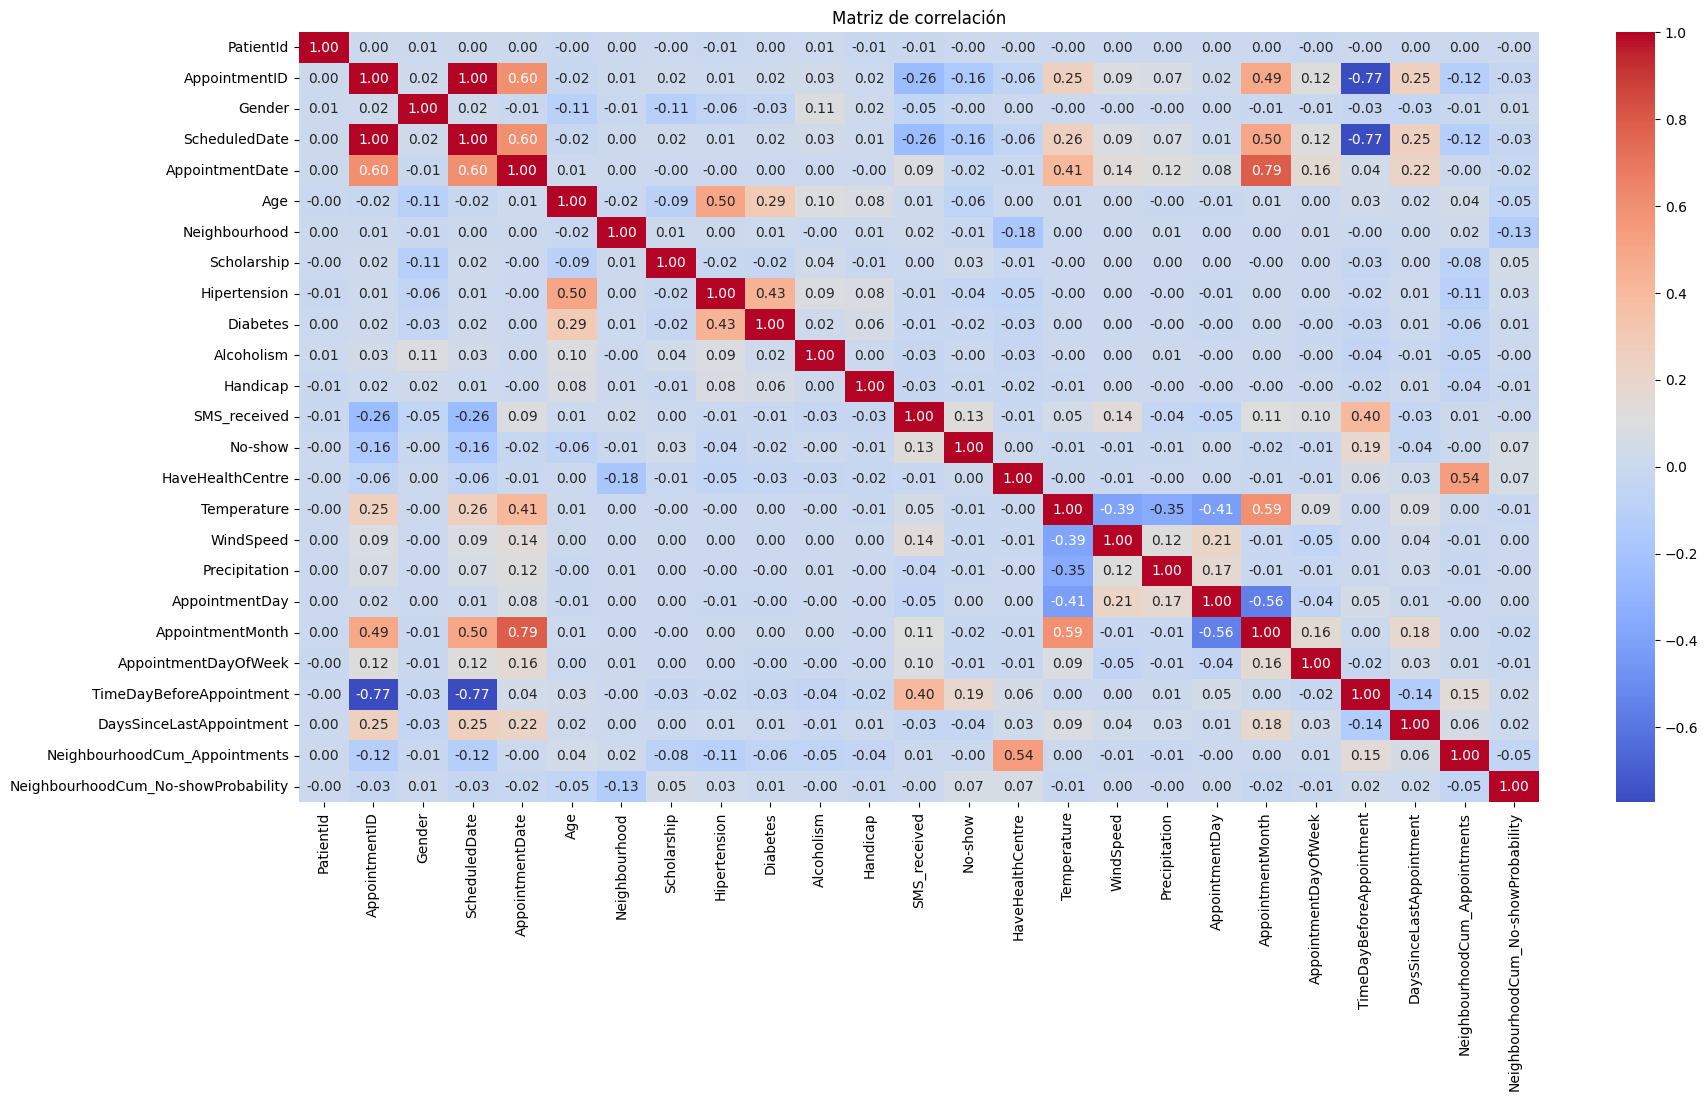

In [65]:
# Se calcula la matriz de correlación
corr_1 = medical_appointments_transformed.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(20, 10))
sns.heatmap(corr_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# 3.1) Se divide el dataset en conjunto de entrenamiento y prueba
Para continuar el procesamiento

In [66]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba de forma estratificada
train_df, test_df = train_test_split(medical_appointments_transformed, 
                                     test_size=0.2, 
                                     stratify=medical_appointments_transformed['No-show'], 
                                     random_state=0)


[Text(0, 0, 'No (Sí Asiste)'), Text(1, 0, 'Yes (No Asiste)')]

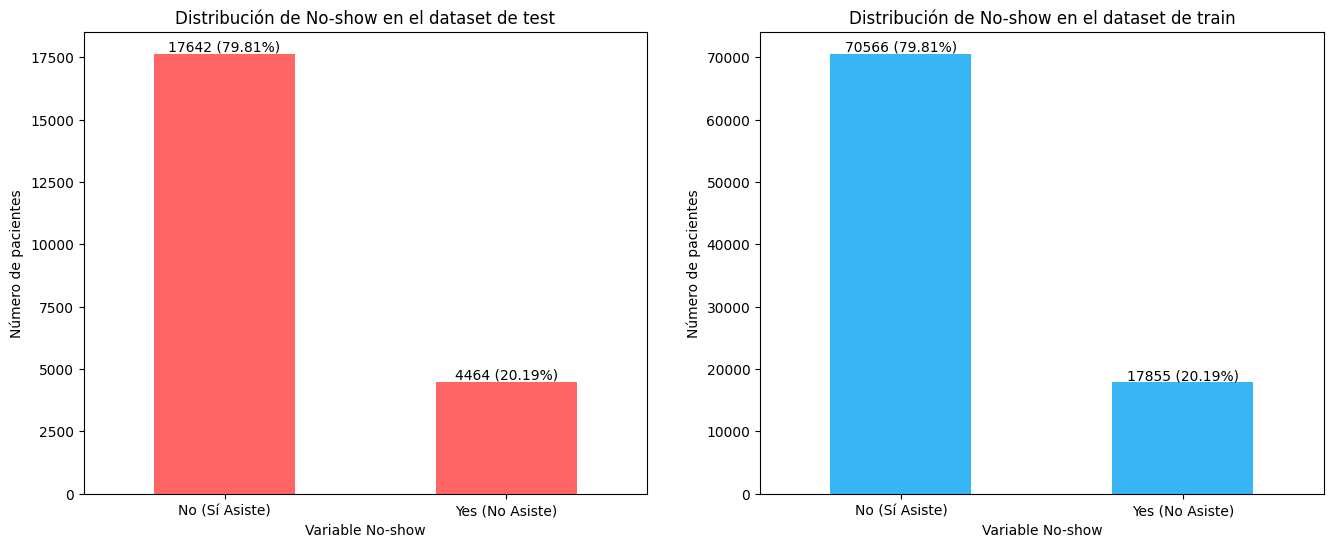

In [67]:
# Crear una nueva figura con tamaño 16x6 pulgadas
plt.figure(figsize=(16, 6))

# Subtrama izquierda para el primer gráfico
plt.subplot(1, 2, 1)

# Se verifican los conjunto de test resultante
class_counts_test = test_df['No-show'].value_counts()
class_counts_test.plot(kind='bar', rot=0, color='#FF6565')
plt.xlabel('Variable No-show')
plt.ylabel('Número de pacientes')
plt.title('Distribución de No-show en el dataset de test')
for i, count in enumerate(class_counts_test):
    plt.text(i, count, f'{count} ({count / len(test_df) * 100:.2f}%)', ha='center', va='bottom')
# Cambiar los valores del eje X
plt.gca().set_xticklabels(['No (Sí Asiste)', 'Yes (No Asiste)'])    
    
plt.subplot(1, 2, 2)

# Se verifican los conjunto de train resultante
class_counts_train = train_df['No-show'].value_counts()
class_counts_train.plot(kind='bar', rot=0, color='#38B5F4')
plt.xlabel('Variable No-show')
plt.ylabel('Número de pacientes')
plt.title('Distribución de No-show en el dataset de train')
for i, count in enumerate(class_counts_train):
    plt.text(i, count, f'{count} ({count / len(train_df) * 100:.2f}%)', ha='center', va='bottom')
# Cambiar los valores del eje X
plt.gca().set_xticklabels(['No (Sí Asiste)', 'Yes (No Asiste)'])  

# 3.2) Feature Engeniering parte 2: 
Se generan variables del dataset de entrenamiento: porcentaje de inasistencias de pacientes a sus citas, para no contaminar los datos de test, que son datos "futuros" y no contamos con esa información en un entorno de prueba real

In [68]:
# Calcular la suma acumulativa de inasistencias ('No-show' == 1) por PatientId
train_df['Cumulative_No-shows'] = train_df.groupby('PatientId')['No-show'].transform('cumsum')

# Calcular el número acumulativo de citas por PatientId 
train_df['Cumulative_Appointments'] = train_df.groupby('PatientId').cumcount() + 1

# Calcular la probabilidad acumulativa de inasistencia por cita
train_df['Cumulative_No-showProbability'] = train_df['Cumulative_No-shows'] / train_df['Cumulative_Appointments']

# Asignar un valor de 0 a la primera cita de cada paciente utilizando transform para mantener el índice
train_df['Cumulative_No-showProbability'] = train_df.groupby('PatientId')['Cumulative_No-showProbability'].transform(lambda x: x.shift().fillna(0))

# Se elimina la columna 'Cumulative No-shows'
train_df.drop(columns=['Cumulative_No-shows'], inplace=True)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88421 entries, 24737 to 42542
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   PatientId                            88421 non-null  float64       
 1   AppointmentID                        88421 non-null  int64         
 2   Gender                               88421 non-null  int32         
 3   ScheduledDate                        88421 non-null  datetime64[ns]
 4   AppointmentDate                      88421 non-null  datetime64[ns]
 5   Age                                  88421 non-null  int64         
 6   Neighbourhood                        88421 non-null  int32         
 7   Scholarship                          88421 non-null  int64         
 8   Hipertension                         88421 non-null  int64         
 9   Diabetes                             88421 non-null  int64         
 10  Alcoholism 

In [70]:
# Se observan los cambios
train_df.head()

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Precipitation,AppointmentDay,AppointmentMonth,AppointmentDayOfWeek,TimeDayBeforeAppointment,DaysSinceLastAppointment,NeighbourhoodCum_Appointments,NeighbourhoodCum_No-showProbability,Cumulative_Appointments,Cumulative_No-showProbability
24737,8.426946e+12,5655725,0,2016-05-04,2016-05-04,20,76,0,0,0,...,0.00,4,5,5,0,0.0,1977,0.216490,1,0.0
83723,3.261748e+12,5617513,0,2016-04-25,2016-05-19,54,38,0,0,0,...,0.31,19,5,3,24,0.0,7717,0.189841,1,0.0
1440,9.557364e+13,5599678,0,2016-04-19,2016-04-29,54,67,0,0,0,...,0.94,29,4,0,10,0.0,1332,0.204204,1,0.0
40268,3.787417e+11,5642026,1,2016-04-29,2016-05-02,57,66,0,1,1,...,0.00,2,5,1,3,0.0,3131,0.158416,1,0.0
78090,5.117885e+13,5750438,0,2016-05-31,2016-05-31,50,66,0,0,0,...,0.00,31,5,4,0,0.0,3131,0.158416,1,0.0


# 3.3) Se visualiza la correlación de datos

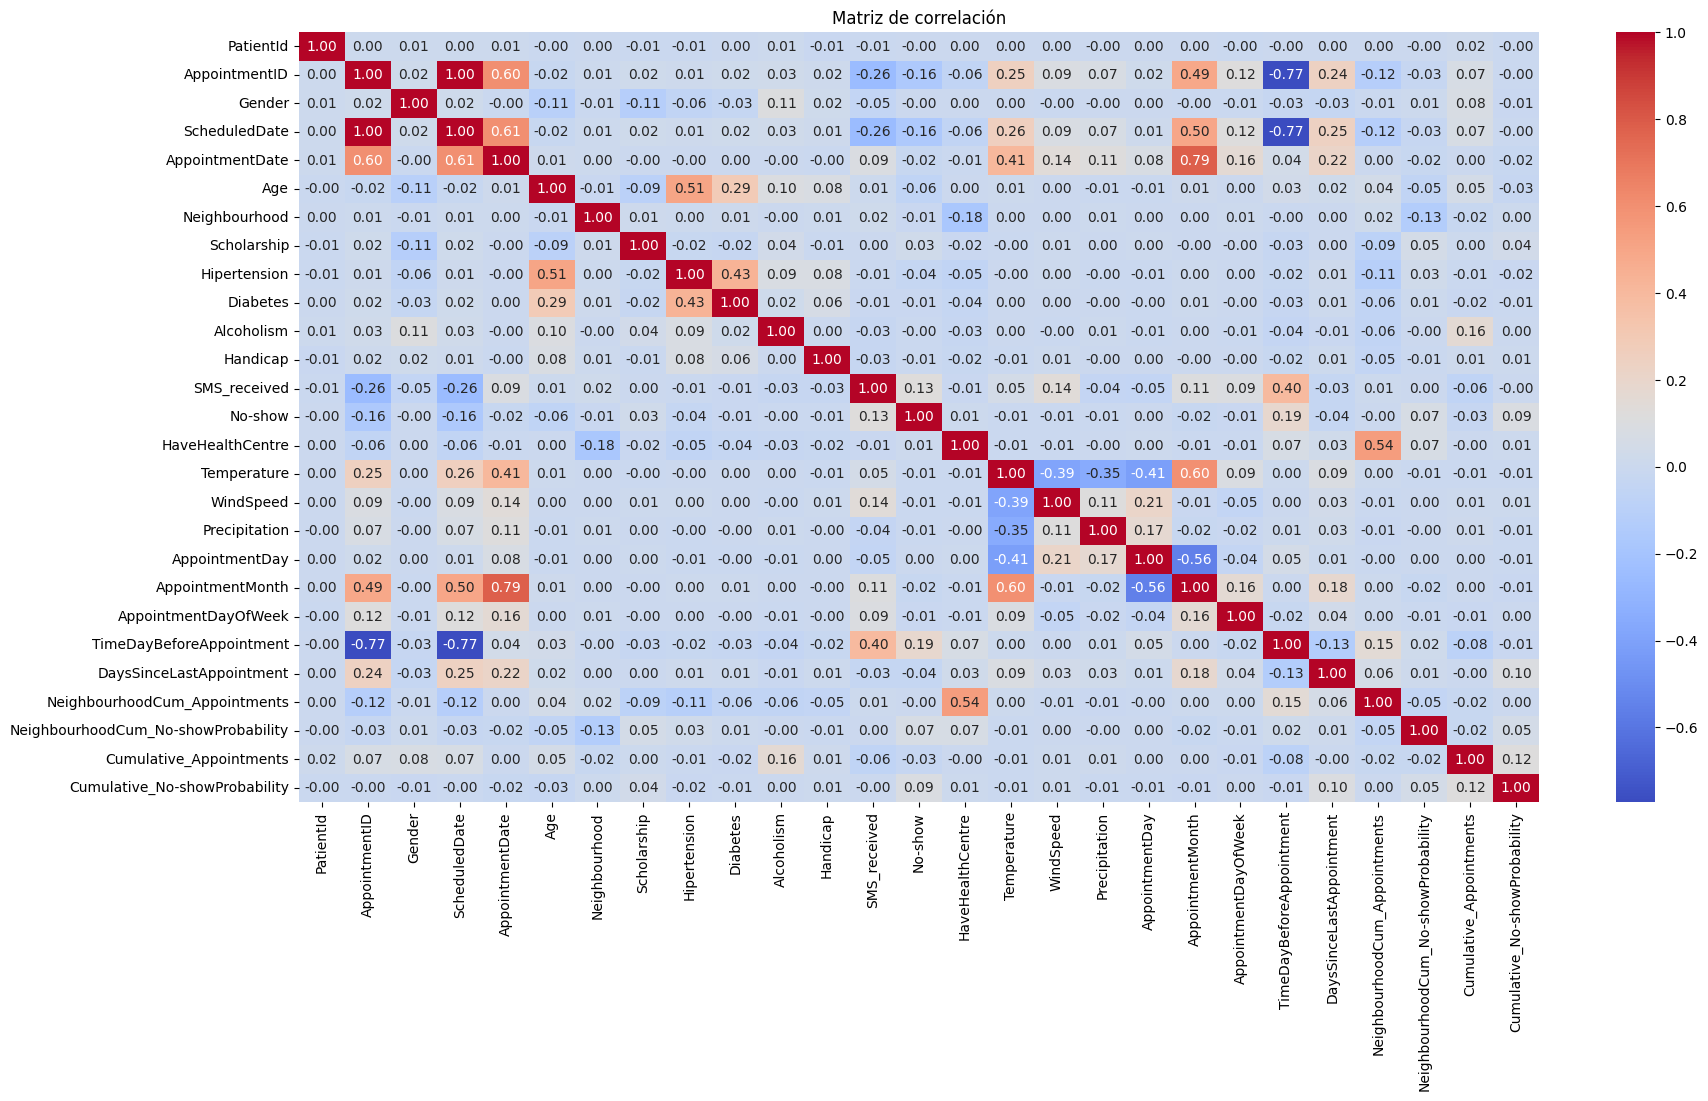

In [71]:
# Se calcula la matriz de correlación
corr_2 = train_df.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(20, 10))
sns.heatmap(corr_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# 3.4) Se cruza la informacion con el dataset de test

In [329]:
# La siguiente tranformación no se hace porque existen PatientId que tienen decimales

# Se verifica que train_df y test_df sean valores del tipo str, para poder realizar la unión
# train_df['PatientId'] = train_df['PatientId'].astype(str)
# test_df['PatientId'] = test_df['PatientId'].astype(str)

# Se crea un DataFrame temporal con los valores únicos de 'PatientId', 'Cumulative No-show Probability' y 'Cumulative Appointments',
# Se selecciona el último registro por PatientId 
temp_df = train_df.groupby('PatientId').tail(1)[['PatientId', 'Cumulative Appointments', 'Cumulative No-show Probability']]

# Resetear el índice de temp_df
temp_df.reset_index(drop=True, inplace=True)

In [330]:
# Se visualizan los cambios
temp_df.head(10)

,PatientId,Cumulative Appointments,Cumulative No-show Probability
0,8.426946e+12,1,0.0
1,5.117885e+13,1,0.0
2,8.115663e+13,1,0.0
3,3.993939e+13,1,0.0
4,2.245957e+12,1,0.0
5,2.292624e+12,1,0.0
6,5.311752e+11,1,0.0
7,4.939936e+11,1,0.0
8,8.216193e+12,1,0.0
9,5.692454e+13,1,0.0


In [331]:
# Exportar el DataFrame a un archivo Excel
temp_df.to_excel('temp_df_v4.xlsx', index=False)

In [332]:
# Se realiza la unión de los DataFrames
test_df = test_df.merge(temp_df, on='PatientId', how='left')

# Se asigna 0 a 'Cumulative No-show Probability' y 'Cumulative Appointments' en caso de que no haya una coincidencia, ya que significa que es la primera cita del paciente
test_df['Cumulative Appointments'].fillna(0, inplace=True)
test_df['Cumulative No-show Probability'].fillna(train_df['No-show'].mean(), inplace=True)

In [333]:
# Se observan los cambios
test_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No-show,NeighbourhoodLongitude,NeighbourhoodLatitude,NeighbourhoodGroup,Age_Group,TimeDay_Before_Appointment,Appointment_DayOfWeek,Days_Since_LastAppointment,Cumulative Appointments,Cumulative No-show Probability
0,8.345119e+11,5656419,1,504,505,11,75,0,0,0,...,0,-40.314606,-20.292850,9,3,1,3,1.0,3.0,0.000000
1,4.284285e+13,5636498,0,428,503,62,39,0,0,0,...,0,-40.296098,-20.285091,6,4,5,4,1.0,1.0,0.000000
2,7.925227e+13,5736253,1,525,601,6,23,0,0,0,...,0,-40.322900,-20.320574,7,3,7,5,7.0,3.0,0.000000
3,9.874517e+10,5698000,1,516,516,2,9,0,0,0,...,0,-40.352878,-20.315347,2,3,0,1,0.0,0.0,0.201932
4,1.336493e+13,5740964,1,525,525,59,43,0,0,0,...,0,-40.299928,-20.258305,3,4,0,5,1.0,27.0,0.076923
5,5.251695e+13,5694082,0,513,513,63,33,0,0,0,...,0,-40.350965,-20.322612,2,4,0,0,0.0,1.0,0.000000
6,9.594195e+14,5721271,1,519,525,41,38,0,0,0,...,0,-40.265453,-20.259219,5,0,6,5,1.0,11.0,0.400000
7,9.442336e+12,5578746,1,413,503,46,36,0,0,0,...,0,-40.307586,-20.295400,9,0,20,4,0.0,2.0,0.000000
8,7.863139e+14,5773925,1,606,606,74,10,0,0,0,...,0,-40.335658,-20.321947,2,2,0,1,28.0,1.0,0.000000
9,9.763563e+10,5691339,1,512,520,6,37,1,0,0,...,0,-40.292907,-20.258401,3,3,8,0,0.0,0.0,0.201932


In [334]:
# Exportar el DataFrame a un archivo Excel
test_df.to_excel('test_df_v4.xlsx', index=False)

# 3.5) Se elimina la información no relevante

In [335]:
# Se elimina la informacion que no es relevante
train_df = train_df.drop(['PatientId'], axis=1)
test_df = test_df.drop(['PatientId'], axis=1)

In [336]:
# Se verifican dimensiones de los conjuntos de datos
print(train_df.shape, test_df.shape)

(88421, 24) (22106, 22)


# 3.6) Se divide el conjunto de entrenamiento en características y etiquetas

In [337]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88421 entries, 24737 to 42542
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   AppointmentID                                 88421 non-null  int64  
 1   Gender                                        88421 non-null  int32  
 2   ScheduledDay                                  88421 non-null  int32  
 3   AppointmentDay                                88421 non-null  int32  
 4   Age                                           88421 non-null  int64  
 5   Neighbourhood                                 88421 non-null  int32  
 6   Scholarship                                   88421 non-null  int64  
 7   Hipertension                                  88421 non-null  int64  
 8   Diabetes                                      88421 non-null  int64  
 9   Alcoholism                                    88421 non-null  

In [338]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AppointmentID                   22106 non-null  int64  
 1   Gender                          22106 non-null  int32  
 2   ScheduledDay                    22106 non-null  int32  
 3   AppointmentDay                  22106 non-null  int32  
 4   Age                             22106 non-null  int64  
 5   Neighbourhood                   22106 non-null  int32  
 6   Scholarship                     22106 non-null  int64  
 7   Hipertension                    22106 non-null  int64  
 8   Diabetes                        22106 non-null  int64  
 9   Alcoholism                      22106 non-null  int64  
 10  Handcap                         22106 non-null  int64  
 11  SMS_received                    22106 non-null  int64  
 12  No-show                         

In [339]:
# Se divide el conjunto de entrenamiento en características y etiquetas
X_train_set = train_df.drop('No-show', axis=1)
y_train_set = train_df['No-show']
X_test_set = test_df.drop('No-show', axis=1)
y_test_set = test_df['No-show']

In [340]:
X_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88421 entries, 24737 to 42542
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   AppointmentID                                 88421 non-null  int64  
 1   Gender                                        88421 non-null  int32  
 2   ScheduledDay                                  88421 non-null  int32  
 3   AppointmentDay                                88421 non-null  int32  
 4   Age                                           88421 non-null  int64  
 5   Neighbourhood                                 88421 non-null  int32  
 6   Scholarship                                   88421 non-null  int64  
 7   Hipertension                                  88421 non-null  int64  
 8   Diabetes                                      88421 non-null  int64  
 9   Alcoholism                                    88421 non-null  

In [341]:
X_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AppointmentID                   22106 non-null  int64  
 1   Gender                          22106 non-null  int32  
 2   ScheduledDay                    22106 non-null  int32  
 3   AppointmentDay                  22106 non-null  int32  
 4   Age                             22106 non-null  int64  
 5   Neighbourhood                   22106 non-null  int32  
 6   Scholarship                     22106 non-null  int64  
 7   Hipertension                    22106 non-null  int64  
 8   Diabetes                        22106 non-null  int64  
 9   Alcoholism                      22106 non-null  int64  
 10  Handcap                         22106 non-null  int64  
 11  SMS_received                    22106 non-null  int64  
 12  NeighbourhoodLongitude          

# 4) Se estandarizan las bases de datos

In [343]:
# Guardar los nombres de las columnas
column_names = X_train_set.columns

# Se crea una instancia de StandardScaler
scaler = StandardScaler()

# Se ajusta el escalador a los datos de entrenamiento y se transforman
X_train_scaled = scaler.fit_transform(X_train_set)
# Se transforman los datos de test utilizando el mismo escalador que se ajustó a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test_set)  

# Convertir los resultados a DataFrame para facilitar la manipulación y visualización, 
# utilizando los nombres de las columnas guardados previamente
X_train_df = pd.DataFrame(X_train_scaled, columns=column_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=column_names)

# Número de características en el DataFrame
num_features = X_train_df.shape[1]

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Neighbourhood Cumulative Appointments
- Neighbourhood Cumulative No-show Probability


In [ ]:
# Número de columnas para los subgráficos
num_columns = 2

# Calcular el número de filas basado en el número de características y columnas
num_rows = num_features // num_columns + (num_features % num_columns > 0)


# Crear una figura grande para acomodar todos los subgráficos
plt.figure(figsize=(15, 7 * num_rows))

# Crear un histograma para cada característica
for i in range(num_features):
    plt.subplot(num_rows, num_columns, i+1)
    
    # Histograma de los datos de entrenamiento en azul
    sns.histplot(X_train_df.iloc[:, i], kde=True, color='blue', alpha=0.5, label='Entrenamiento')
    
    # Histograma de los datos de test en rojo
    sns.histplot(X_test_df.iloc[:, i], kde=True, color='red', alpha=0.5, label='Test')
    
    # Usar un salto de línea para dividir el título en dos líneas
    plt.title(f'Distribución de\n{column_names[i]} después de la estandarización', fontsize=10)
    
    plt.xlabel('Valor estandarizado', fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    plt.xticks(rotation=45)
    plt.legend()

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

# 5) Se realiza balanceo de clases en el dataset de entrenamiento

In [ ]:
# Se crea una instancia de SMOTE y ENN
smote = SMOTE(sampling_strategy='auto', random_state=42)
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)

# Se crea una instancia de la clase Pipeline
pipeline = Pipeline([('smote', smote), ('enn', enn)])

# Se aplica el pipeline a los datos
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_scaled, y_train_set)

# Distribución del dataset posterior a la aplicación de SMOTE-ENN
class_counts = y_train_resampled.value_counts()

# Se define el gráfico con los parámetros adicionales solicitados
class_counts.plot(kind='bar', rot=0, color=['#66c2a5', '#fc8d62'])

# Se añaden etiquetas y título al gráfico
plt.xlabel('Variable No-show')
plt.ylabel('Número de pacientes')
plt.title('Distribución de No-show en el dataset de entrenamiento')

# Se añaden los porcentajes en las barras
for i, count in enumerate(class_counts):
    plt.text(i, count, f'{count} ({count / len(X_train_resampled) * 100:.2f}%)', ha='center', va='bottom')
    
# Se establecen las etiquetas en el eje X
plt.xticks([0, 1], ['No (Sí asiste)', 'Yes (No asiste)'])

# Se muestra el gráfico
plt.show()

# 6) Reduccion de dimensionalidad 

In [ ]:
# Aplicar PCA para reducir la dimensionalidad mientras se conserva la mayor cantidad de varianza posible
pca = PCA(n_components=0.95) 

# Ajustar y transformar los datos de entrenamiento
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Graficar los primeros tres componentes principales en un gráfico 3D
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train_resampled, cmap='viridis', edgecolor='k', s=40)
ax.set_title('PCA - Primeros tres componentes principales')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
plt.show()

# Imprimir la cantidad de componentes y la varianza explicada
print(f"Número de componentes: {pca.n_components_}")
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {np.sum(pca.explained_variance_ratio_)}")

In [ ]:
#Se guardan los datos de entrenamiento y test en archivos csv
with open('X_train.pkl', 'wb') as file:
    pickle.dump(X_train_pca, file)
# Guardar y_train
with open('y_train.pkl', 'wb') as file:
    pickle.dump(y_train_resampled, file)
# Guardar X_test
with open('X_test.pkl', 'wb') as file:
    pickle.dump(X_test_pca, file)
# Guardar y_test
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test_set, file)

# 7) Entrenamiento de modelos de Machine Learning:

In [309]:
# Se cargan los datos de entrenamiento y test desde los archivos csv
with open('X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)
with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)
with open('X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)
with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122477, 14)
(122477,)
(22106, 14)
(22106,)


In [310]:
#Se verifica la base de datos con las que se entrenará el modelo
X_train.shape, y_train.shape

# Se verifican los valores unicos de la variable objetivo en el dataset de entrenamiento
y_train.value_counts()

No-show
0    70566
1    51911
Name: count, dtype: int64

In [311]:
# Se verifica la base de datos con las que se testeara el modelo
X_test.shape, y_test.shape

# Se verifican los valores unicos de la variable objetivo en el dataset de test
y_test.value_counts()

No-show
0    17642
1     4464
Name: count, dtype: int64

In [312]:
# Se define un peso para las clases segun la distribución de las mismas en el dataset de test
class_counts_test = y_test.value_counts()
peso_clase_mayoritaria = class_counts_test[1] / len(y_test)
peso_clase_minoritaria = class_counts_test[0] / len(y_test)
class_weight = {0: peso_clase_mayoritaria, 1: peso_clase_minoritaria}
print (class_weight)

{0: 0.2019361259386592, 1: 0.7980638740613408}


In [313]:
# Se crea una función para evaluar los modelos de clasificación
def evaluar_modelo(modelo, parametros, X_train, y_train, X_test, y_test):

    labels = ['Sí Asiste', 'No Asiste']
    # Se obtienen los mejores parámetros y el mejor modelo
    best_params = parametros
    best_model = modelo
    # Puntuaciones/probabilidades de la clase positiva
    y_scores_train = cross_val_predict(best_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

    # Se calcula la predicción del modelo en el conjunto de entrenamiento con validación cruzada
    y_pred_train = cross_val_predict(best_model, X_train, y_train, cv=5)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_score_train = f1_score(y_train, y_pred_train)
    
    print(f"Mejores parámetros encontrados: {best_params}")
    print('\033[1m' + '.' * len("Resultados datos de entrenamiento con validación cruzada:") + '\n' + "Resultados datos de entrenamiento con validación cruzada:" + '\033[0m')
    print("Accuracy: (Datos Train)", accuracy_train)
    print("Precision: (Datos Train)", precision_train)
    print("Recall: (Datos Train)", recall_train)
    print("F1 Score: (Datos Train)", f1_score_train)
    # Se  hace print de los datos totales de los datos de entrenamiento
    print("Total de datos de entrenamiento:", len(y_train))
    print("Datos de entrenamiento con etiqueta 0:", len(y_train[y_train == 0]))
    print("Datos de entrenamiento con etiqueta 1:", len(y_train[y_train == 1]))

    # Matriz de confusión y curva ROC (datos de entrenamiento)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    conf_matrix = confusion_matrix(y_train, y_pred_train)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[0])
    ax[0].set_title('Matriz de Confusión (Datos de Train)')
    ax[0].set_xlabel('Valores Predichos')
    ax[0].set_ylabel('Valores Reales')
    print (conf_matrix)

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_train, y_scores_train)
    roc_auc = auc(fpr, tpr)
    
    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Tasa de Falsos Positivos')
    ax[1].set_ylabel('Tasa de Verdaderos Positivos')
    ax[1].set_title('Curva ROC (Datos de Train)')
    ax[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    # Hacer predicciones con el mejor modelo en el conjunto de test
    y_pred_test = best_model.predict(X_test)
    # Puntuaciones/probabilidades de la clase positiva
    y_scores_test = modelo.predict_proba(X_test)[:, 1]

    # Calcular y presentar las métricas de evaluación para los datos de test
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_score_test = f1_score(y_test, y_pred_test)

    print('\033[1m' + '.' * len("Resultados datos de test con el mejor modelo:") + '\n' + "Resultados datos de test con el mejor modelo:" + '\033[0m')
    print(f"Accuracy (Datos de Test): {accuracy_test}") 
    print(f"Precision (Datos de Test): {precision_test}")
    print(f"Recall (Datos de Test): {recall_test}")
    print(f"F1 Score (Datos de Test): {f1_score_test:}")
    # Se  hace print de los datos totales de los datos de test
    print("Total de datos de test:", len(y_test))
    print("Datos de test con etiqueta 0:", len(y_test[y_test == 0]))
    print("Datos de test con etiqueta 1:", len(y_test[y_test == 1]))

    # Matriz de confusión y curva ROC (datos de test)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, ax=ax[0])
    ax[0].set_title('Matriz de Confusión (Datos de Test)')
    ax[0].set_xlabel('Valores Predichos')
    ax[0].set_ylabel('Valores Reales')
    print (conf_matrix)

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_test)
    roc_auc = auc(fpr, tpr)
    
    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Tasa de Falsos Positivos')
    ax[1].set_ylabel('Tasa de Verdaderos Positivos')
    ax[1].set_title('Curva ROC (Datos de Test)')
    ax[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

7.1 Entrenamiento Regresión Logisitica

Modelo cargado desde el archivo.
Mejores parámetros encontrados: {'C': 1e-11, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
.........................................................
Resultados datos de entrenamiento con validación cruzada:
Accuracy: (Datos Train) 0.5846158870645101
Precision: (Datos Train) 0.505908790180914
Recall: (Datos Train) 0.8543661266398258
F1 Score: (Datos Train) 0.6355058498176633
Total de datos de entrenamiento: 122477
Datos de entrenamiento con etiqueta 0: 70566
Datos de entrenamiento con etiqueta 1: 51911
[[27251 43315]
 [ 7560 44351]]


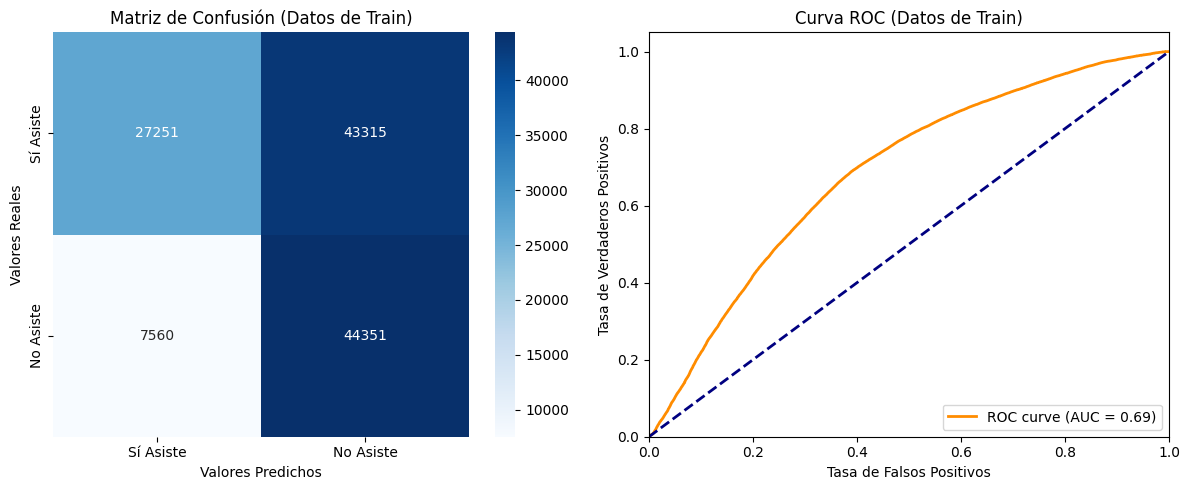

.............................................
Resultados datos de test con el mejor modelo:
Accuracy (Datos de Test): 0.44992309780150186
Precision (Datos de Test): 0.24530050304474452
Recall (Datos de Test): 0.8301971326164874
F1 Score (Datos de Test): 0.37870427140813406
Total de datos de test: 22106
Datos de test con etiqueta 0: 17642
Datos de test con etiqueta 1: 4464
[[ 6240 11402]
 [  758  3706]]


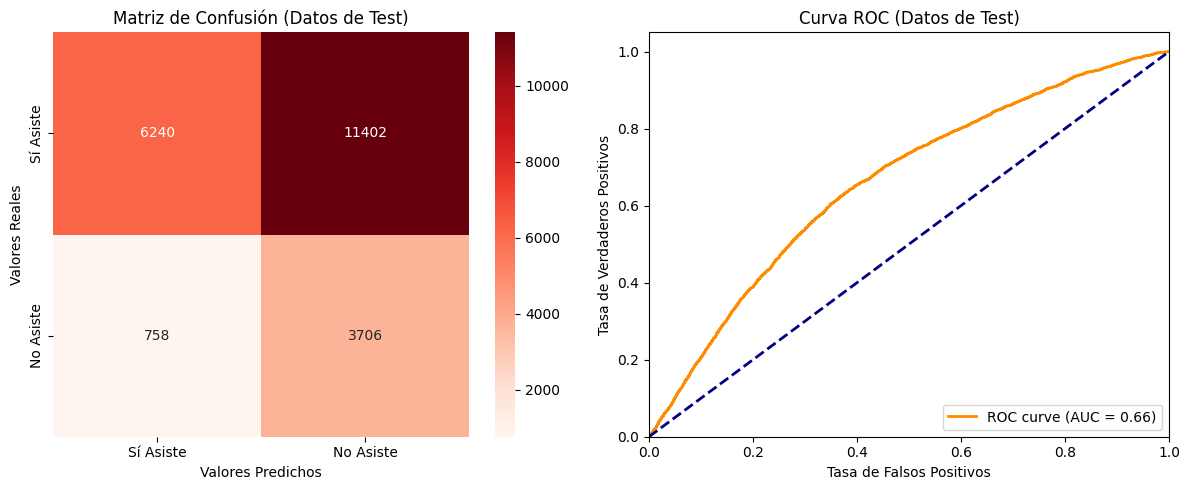

In [314]:
# Nombre del archivo donde se guardará/cargará el modelo
nombre_modelo = 'best_logistic_regression.joblib'
nombre_params = 'best_params_logistic_regression.json'

if os.path.exists(nombre_modelo) and os.path.exists(nombre_params):
    best_model_logistic_regresion = joblib.load(nombre_modelo)
    with open(nombre_params, 'r') as file:
        best_params_logistic_regresion = json.load(file)
    print("Modelo cargado desde el archivo.")
else:
    # Diccionario de parámetros a probar extendiendo el espacio de búsqueda
    param_grid = {
        'max_iter': [1000, 2000, 3000, 4000, 5000],
        'C': [0.1e-10, 0.1e-09, 0.1e-08, 0.1e-07, 0.1e-06, 0.1e-05, 0.1e-04, 0.1e-03, 0.01, 0.1, 1, 10, 100, 1000], # C controla la regularización, sirve para evitar el sobreajuste, a menor C, mayor regularización lo que implica un modelo más simple, con mayor C, el modelo se ajusta más a los datos de entrenamiento
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

    # Crear una instancia de GridSearchCV optimizada para la precisión
    grid_search = GridSearchCV(LogisticRegression(class_weight=class_weight), param_grid, cv=5, scoring='precision', n_jobs=-1) 

    # Ajustar GridSearchCV
    grid_search.fit(X_train, y_train)

    # Guardar el mejor modelo
    best_model_logistic_regresion = grid_search.best_estimator_

    # Guardar el modelo en el archivo
    joblib.dump(best_model_logistic_regresion, nombre_modelo)
    print("Modelo entrenado y guardado en el archivo.")
    # Guardar los mejores parámetros en un archivo JSON
    best_params_logistic_regresion = grid_search.best_params_
    with open(nombre_params, 'w') as file:
        json.dump(best_params_logistic_regresion, file)

# Evaluar el modelo (tanto si se acaba de entrenar como si se ha cargado desde un archivo)
evaluar_modelo(best_model_logistic_regresion, best_params_logistic_regresion, X_train, y_train, X_test, y_test)


7.2 Entrenamiento de DecisionTreeClassifier

Modelo entrenado y guardado en el archivo.
Mejores parámetros encontrados: GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.2019361259386592,
                                                            1: 0.7980638740613408}),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40],
                         'min_impurity_decrease': [0.0, 0.01, 0.02],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='precision')
.........................................................
Resultados datos de entrenamiento con validación cruzada:
Accuracy: (Datos Train) 0.8042489610294178
Precision: (Datos Train) 0.7555620608899297
Recall: (Datos Train) 0.7

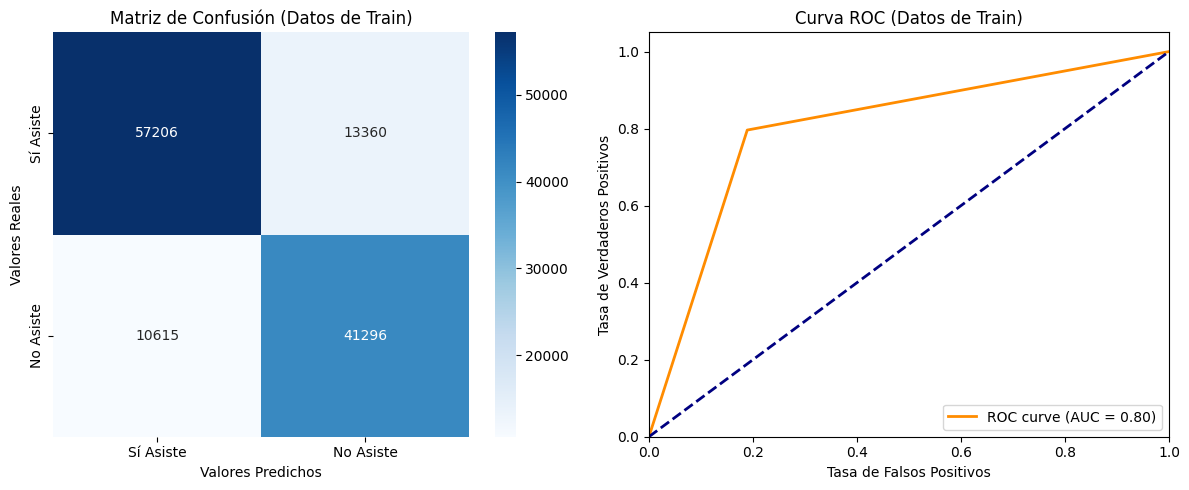

.............................................
Resultados datos de test con el mejor modelo:
Accuracy (Datos de Test): 0.6940197231520854
Precision (Datos de Test): 0.2719159063863546
Recall (Datos de Test): 0.3071236559139785
F1 Score (Datos de Test): 0.2884494003787082
Total de datos de test: 22106
Datos de test con etiqueta 0: 17642
Datos de test con etiqueta 1: 4464
[[13971  3671]
 [ 3093  1371]]


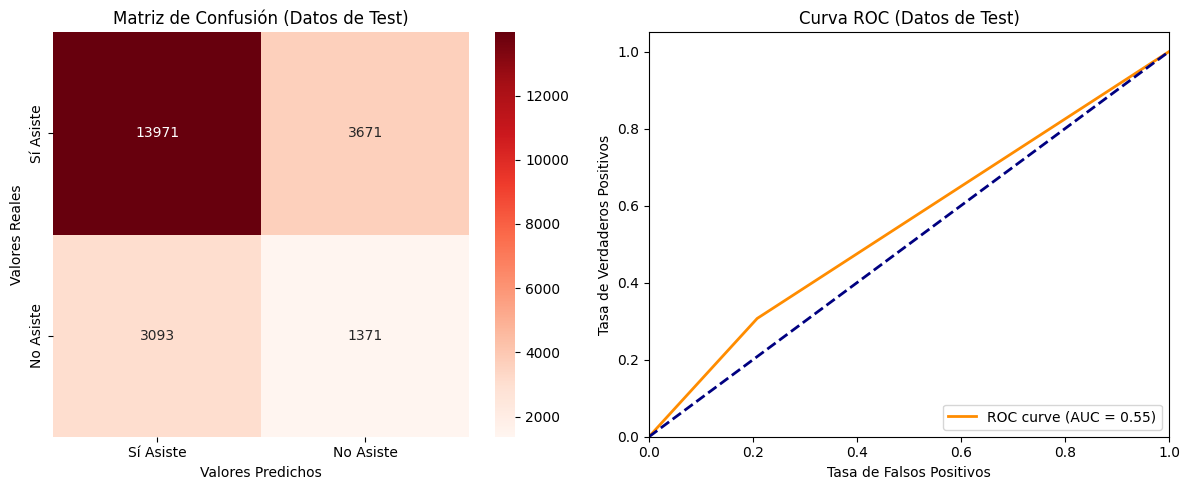

In [315]:
# Nombre del archivo donde se guardará/cargará el modelo
nombre_modelo = 'best_model_tree.joblib'
nombre_params = 'best_params_tree.json'

if os.path.exists(nombre_modelo) and os.path.exists(nombre_params):
    best_model_tree = joblib.load(nombre_modelo)
    with open(nombre_params, 'r') as file:
        best_params_tree = json.load(file)
        grid_search = best_params_tree
    print("Modelo cargado desde el archivo.")
else:
    # Diccionario de parámetros a probar extendiendo el espacio de búsqueda
    param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 15],  # Número de muestras para dividir
    'min_samples_leaf': [1, 2, 5, 10],  # Múmero de muestras en un nodo hoja
    'criterion': ['gini', 'entropy'],  # Función para medir el grado de impureza
    'max_features': ['auto', 'sqrt', 'log2', None],  # Número de características
    'max_leaf_nodes': [None, 10, 20, 30, 40],  # Número máximo de nodos hoja
    'min_impurity_decrease': [0.0, 0.01, 0.02]  # Umbral para la reducción de la impureza
}

   # Crear una instancia de GridSearchCV, optimizada para la precisión
    grid_search = GridSearchCV(DecisionTreeClassifier(class_weight=class_weight), param_grid, cv=5, scoring='precision', n_jobs=-1)

   # Ajustar GridSearchCV a los datos
    grid_search.fit(X_train, y_train)

    # Guardar el mejor modelo
    best_model_tree = grid_search.best_estimator_

    # Guardar el modelo en el archivo
    joblib.dump(best_model_tree, nombre_modelo)
    print("Modelo entrenado y guardado en el archivo.")
    # Guardar los mejores parámetros en un archivo JSON
    best_params_tree = grid_search.best_params_
    with open(nombre_params, 'w') as f:
        json.dump(best_params_tree, f)

# Evaluar el modelo (tanto si se acaba de entrenar como si se ha cargado desde un archivo)
evaluar_modelo (best_model_tree, grid_search, X_train, y_train, X_test, y_test)

7.3 Entrenamiento de redes neuronales

In [316]:
#Se importan las librerias necesarias para el uso de pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Se define el dispositivo a utilizar
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [317]:
# Se define la funcion para grafiar la perdida por epoca
def graficar_progreso(losses, inicio_folds, grado=3):
    plt.figure(figsize=(20, 10))
    # Gráfico original
    plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='blue', label='Pérdida Real')

     # Marcar y anotar el inicio de cada fold
    for i, inicio in enumerate(inicio_folds):
        plt.axvline(x=inicio, color='black', linestyle='--', lw=1)
        plt.text(inicio, max(losses)*0.95, f'Inicio Fold {i+1}', rotation=90, color='black', fontsize=12, fontweight='bold')

    # Ajustando la curva de tendencia
    z = np.polyfit(range(1, len(losses) + 1), losses, grado)  # Ajuste polinomial
    p = np.poly1d(z)  # Creación de un polinomio
    plt.plot(range(1, len(losses) + 1), p(range(1, len(losses) + 1)), "r--", label='Curva de Tendencia')  # Curva de tendencia en rojo

    # Configuración del gráfico
    plt.title('Pérdida por Época a través de los Folds')
    plt.xlabel('Época Total')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.show()

In [318]:
# Se define la función para evaluar el modelo
def evaluar_modelo_pytorch(model, X_train_tensor, y_train, X_test_tensor, y_test):
    # Evaluación con datos de entrenamiento
    y_pred = model(X_train_tensor).detach().cpu().numpy()
    y_pred_bin = (y_pred > 0.5).astype(int)

    # Cálculo de métricas para datos de entrenamiento
    accuracy = accuracy_score(y_train, y_pred_bin)
    precision = precision_score(y_train, y_pred_bin)
    recall = recall_score(y_train, y_pred_bin)
    f1 = f1_score(y_train, y_pred_bin)

    # Visualización de métricas y gráficos para datos de entrenamiento
    print('\033[1m' + '.' * len("Resultados datos de entrenamiento:") + '\n' + "Resultados datos de entrenamiento:" + '\033[0m')
    print(f"Accuracy (Datos de Train): {accuracy}")
    print(f"Precision (Datos de Train): {precision}")
    print(f"Recall (Datos de Train): {recall}")
    print(f"F1 Score (Datos de Train): {f1}")

    # Gráficos para datos de entrenamiento
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    conf_matrix = confusion_matrix(y_train, y_pred_bin)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Train)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print (conf_matrix)

    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Train)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    # Evaluación con datos de prueba
    y_pred_test = model(X_test_tensor).detach().cpu().numpy()
    y_pred_test_bin = (y_pred_test > 0.5).astype(int)

    # Cálculo de métricas para datos de prueba
    accuracy_test = accuracy_score(y_test, y_pred_test_bin)
    precision_test = precision_score(y_test, y_pred_test_bin)
    recall_test = recall_score(y_test, y_pred_test_bin)
    f1_test = f1_score(y_test, y_pred_test_bin)

    # Visualización de métricas y gráficos para datos de prueba
    print('\033[1m' + '.' * len("Resultados datos de test:") + '\n' + "Resultados datos de test:" + '\033[0m')
    print(f"Accuracy (Datos de Test): {accuracy_test}")
    print(f"Precision (Datos de Test): {precision_test}")
    print(f"Recall (Datos de Test): {recall_test}")
    print(f"F1 Score (Datos de Test): {f1_test}")

    # Gráficos para datos de prueba
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    conf_matrix_test = confusion_matrix(y_test, y_pred_test_bin)
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', ax=axes[0],
                xticklabels=['Asiste', 'No-show'], yticklabels=['Asiste', 'No-show'])
    axes[0].set_title('Matriz de Confusión (Datos de Test)')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    print (conf_matrix_test)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Curva ROC (Datos de Test)')
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()


In [319]:
#Se verifica si el modelo ya ha sido entrenado
class NeuralNet(nn.Module):
    # Definir la arquitectura del modelo
        def __init__(self, input_size):
            super(NeuralNet, self).__init__()
            self.layer1 = nn.Linear(input_size, 256) #  Capa oculta 1
            self.bn1 = nn.BatchNorm1d(256) # Batch Normalization (BN), sirve para acelerar el entrenamiento y mejorar la precisión
            self.relu1 = nn.ReLU() # Función de activación ReLU, sirve para introducir no linealidades en la red, permitiendo que el modelo aprenda relaciones más complejas
                
            self.layer2 = nn.Linear(256, 1024) #  Capa oculta 2
            self.relu2 = nn.ReLU()
            self.bn2 = nn.BatchNorm1d(1024) 
            self.dropout1 = nn.Dropout(0.5) # Dropout, sirve para evitar el sobreajuste desactivando aleatoriamente un porcentaje de las neuronas, en este caso, el 50%

            self.layer3 = nn.Linear(1024, 256) # Capa oculta 3
            self.relu3 = nn.ReLU()
            self.bn3 = nn.BatchNorm1d(256) 
            self.dropout2 = nn.Dropout(0.5)

            self.output_layer = nn.Linear(256, 1) # Capa de salida
            self.sigmoid = nn.Sigmoid()
            
        def forward(self, x):
            out = self.bn1(self.layer1(x))  # Primero aplicar BN a la salida de la capa lineal
            out = self.relu1(out)
                
            out = self.bn2(self.layer2(out)) 
            out = self.relu2(out)
            out = self.dropout1(out)
                
            out = self.bn3(self.layer3(out))  
            out = self.relu3(out)
            out = self.dropout2(out)
                
            out = self.output_layer(out)
            out = self.sigmoid(out)
            return out
# Instanciar el modelo
model = NeuralNet(X_train.shape[1]).to(device)

# Se verifica si el modelo ya ha sido entrenado
if os.path.exists('modelo_pytorch.pth'):
    model.load_state_dict(torch.load('modelo_pytorch.pth'))
    print("Modelo cargado desde el archivo.")
else:
    # Se definen los folds
    skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    num_epochs = 100
    fold_results = []
    losses = []
    inicio_folds = [1]  # La primera época siempre es el inicio del primer fold
    epoca_actual = 0

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

    for fold, (train_index, test_index) in enumerate(skfolds.split(X_train, y_train)):
        print(f'Comenzando el fold {fold+1}')

        X_train_fold = X_train[train_index]
        y_train_fold = y_train[train_index]
        X_valid_fold = X_train[test_index]
        y_valid_fold = y_train[test_index]

        X_train_fold_tensor = torch.tensor(X_train_fold).float().to(device)
        y_train_fold_tensor = torch.tensor(y_train_fold.to_numpy()[:, None]).float().to(device)
        X_valid_fold_tensor = torch.tensor(X_valid_fold).float().to(device)
        y_valid_fold_tensor = torch.tensor(y_valid_fold.to_numpy()[:, None]).float().to(device)

        train_loader = DataLoader(TensorDataset(X_train_fold_tensor, y_train_fold_tensor), batch_size=64, shuffle=True)
        valid_loader = DataLoader(TensorDataset(X_valid_fold_tensor, y_valid_fold_tensor), batch_size=64)

        epoch_losses = []

        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())
            scheduler.step()

            model.eval()
            val_losses = []
            with torch.no_grad():
                for inputs, targets in valid_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    val_losses.append(loss.item())

            epoch_train_loss = torch.tensor(train_losses).mean().item()
            epoch_val_loss = torch.tensor(val_losses).mean().item()
            epoch_losses.append((epoch_train_loss, epoch_val_loss))
            # Se añade la pérdida de validación a la lista global
            losses.append(epoch_val_loss)
            print(f'Fold {fold+1}, Epoch {epoch+1}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

        fold_results.append({
            'fold': fold+1,
            'epoch_losses': epoch_losses,
        })
        # Se añade el número de la última época de este fold al inicio de la lista
        if fold < skfolds.n_splits - 1:
            epoca_actual += num_epochs
            inicio_folds.append(epoca_actual + 1)

    # Se guarda el modelo
    torch.save(model.state_dict(), 'modelo_pytorch.pth')

# Se grafica el progreso de la pérdida a través de los folds
graficar_progreso(losses, inicio_folds, grado=3)

# Se convierten los datos de test a tensores
X_test_tensor = torch.tensor(X_test).float().to(device)

# Se evalúa el modelo entrenado
evaluar_modelo_pytorch(model, X_train_fold_tensor, y_train_fold, X_test_tensor, y_test)


Comenzando el fold 1
Fold 1, Epoch 1, Train Loss: 0.6146, Val Loss: 0.5768
Fold 1, Epoch 2, Train Loss: 0.5913, Val Loss: 0.5673
Fold 1, Epoch 3, Train Loss: 0.5828, Val Loss: 0.5642
Fold 1, Epoch 4, Train Loss: 0.5775, Val Loss: 0.5617
Fold 1, Epoch 5, Train Loss: 0.5734, Val Loss: 0.5595
Fold 1, Epoch 6, Train Loss: 0.5711, Val Loss: 0.5553
Fold 1, Epoch 7, Train Loss: 0.5677, Val Loss: 0.5477
Fold 1, Epoch 8, Train Loss: 0.5651, Val Loss: 0.5470
Fold 1, Epoch 9, Train Loss: 0.5626, Val Loss: 0.5467
Fold 1, Epoch 10, Train Loss: 0.5607, Val Loss: 0.5411
Fold 1, Epoch 11, Train Loss: 0.5588, Val Loss: 0.5391
Fold 1, Epoch 12, Train Loss: 0.5562, Val Loss: 0.5363
Fold 1, Epoch 13, Train Loss: 0.5537, Val Loss: 0.5350
Fold 1, Epoch 14, Train Loss: 0.5527, Val Loss: 0.5363
Fold 1, Epoch 15, Train Loss: 0.5515, Val Loss: 0.5332
Fold 1, Epoch 16, Train Loss: 0.5499, Val Loss: 0.5310
Fold 1, Epoch 17, Train Loss: 0.5486, Val Loss: 0.5303


KeyboardInterrupt: 

7.4 Entrenamiento de Support Vector Machine